# Adım 1: Sahte Veri Üretimi

In [11]:
import pandas as pd
import numpy as np

np.random.seed(42)  # Rastgelelik tekrar edilebilir olsun

# Her grupta 1000 kullanıcı
n = 1000

# Tahmini dönüşüm oranları
donusum_orani_A = 0.12  # %12 dönüşüm oranı
donusum_orani_B = 0.16  # %16 dönüşüm oranı

# Simülasyon verileri
grup_A = pd.DataFrame({
    'grup': 'A',
    'donusum': np.random.binomial(1, donusum_orani_A, n)
})

grup_B = pd.DataFrame({
    'grup': 'B',
    'donusum': np.random.binomial(1, donusum_orani_B, n)
})

df = pd.concat([grup_A, grup_B]).reset_index(drop=True)


# Adım 2: Veri Görselleştirme

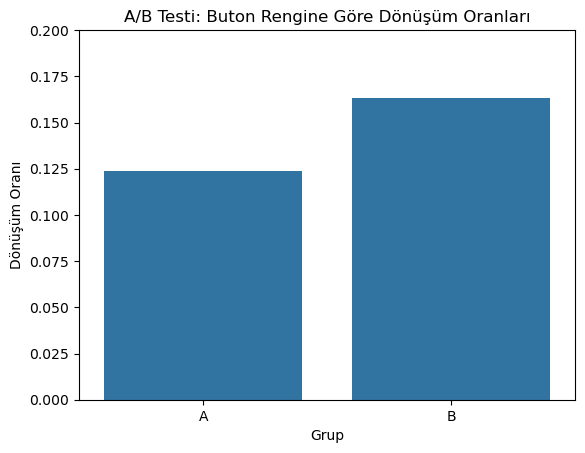

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

donusum_ortalamalari = df.groupby('grup')['donusum'].mean().reset_index()

sns.barplot(x='grup', y='donusum', data=donusum_ortalamalari)
plt.title('A/B Testi: Buton Rengine Göre Dönüşüm Oranları')
plt.ylabel('Dönüşüm Oranı')
plt.xlabel('Grup')
plt.ylim(0, 0.2)
plt.show()


# Adım 3: Hipotez Testi (İstatistiksel Anlamlılık)

In [15]:
from scipy.stats import ttest_ind

# Grupları ayır
donusumler_A = grup_A['donusum']
donusumler_B = grup_B['donusum']

# Bağımsız örneklem t-testi
t_istatistik, p_degeri = ttest_ind(donusumler_A, donusumler_B)

print(f"T-istatistiği: {t_istatistik:.4f}")
print(f"P-değeri: {p_degeri:.4f}")

if p_degeri < 0.05:
    print("Sonuç: Fark istatistiksel olarak anlamlı ✅")
else:
    print("Sonuç: Fark istatistiksel olarak anlamlı değil ❌")


T-istatistiği: -2.4901
P-değeri: 0.0129
Sonuç: Fark istatistiksel olarak anlamlı ✅
